In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import display
import sys
import pandas as pd
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import re
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

/Users/oliver/anaconda3/envs/mda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/

In [2]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.4


For comet: use the data without the outlier at 288 cores, repeat 1 (from notebook `Fig5/df7-comm-updated-rmsd-parallel-IO-Comet_no-outlier.csv`):

In [3]:
data_1x_Bridges_1 = 'df7-comm-updated-rmsd-parallel-IO-Bridge4.csv'
data_1x_Bridges_2 = 'df7-comm-updated-rmsd-parallel-IO-Bridge1.csv'
data_1x_Bridges_3 = 'df7-comm-updated-rmsd-parallel-IO-Bridge2.csv'
data_1x_Bridges_4 = 'df7-comm-updated-rmsd-parallel-IO-Bridge3.csv'
data_1x_comet = 'df7-comm-updated-rmsd-parallel-IO-Comet_no-outlier.csv'
data_1x_SuperMIC = 'df7-comm-updated-rmsd-parallel-IO-SuperMIC.csv'

In [4]:
df7_1x_Bridges_1 = pd.read_csv(data_1x_Bridges_1)
df7_1x_Bridges_2 = pd.read_csv(data_1x_Bridges_2)
df7_1x_Bridges_3 = pd.read_csv(data_1x_Bridges_3)
df7_1x_Bridges_4 = pd.read_csv(data_1x_Bridges_4)
df7_1x_comet = pd.read_csv(data_1x_comet)
df7_1x_SuperMIC = pd.read_csv(data_1x_SuperMIC)

# Fig 9(a)

/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


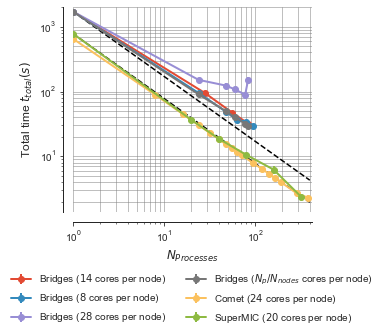

In [5]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

df = [df7_1x_Bridges_1, df7_1x_Bridges_2, df7_1x_Bridges_3, df7_1x_Bridges_4, df7_1x_comet, df7_1x_SuperMIC]
labels = ['Bridges ($14$ cores per node)','Bridges ($8$ cores per node)','Bridges ($28$ cores per node)',
          'Bridges ($N_{p}/N_{nodes}$ cores per node)','Comet ($24$ cores per node)','SuperMIC ($20$ cores per node)']

df[0].index = df[0].loc[:,'blocks']
df[1].index = df[1].loc[:,'blocks']
df[2].index = df[2].loc[:,'blocks']
df[3].index = df[3].loc[:,'blocks']
df[4].index = df[4].loc[:,'blocks']
df[5].index = df[5].loc[:,'blocks']

df[0].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[0])
df[1].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[1])
df[2].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[2])
df[3].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[3])
df[4].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[4])
df[5].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label=labels[5])

ax.yaxis.grid(which='major', linewidth='0.5', color='grey')
ax.xaxis.grid(which='major', linewidth='0.5', color='grey')
ax.yaxis.grid(which='minor', linewidth='0.5', color='grey')
ax.xaxis.grid(which='minor', linewidth='0.5', color='grey')   
    
ax.set_xlabel('$N_{Processes}$')    
ax.set_ylabel('Total time $t_{total}(s)$')

ax.loglog([1, 400], [df[5]['t_tot_max'][1], df[5]['t_tot_max'][1]/400.], '--',color='black')
ax.loglog([1, 400], [df[3]['t_tot_max'][1], df[3]['t_tot_max'][1]/400.], '--',color='black')
ax.set_xlim(1, 420)  
ax.set_ylim(0, 2000)
sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.25), frameon=False, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_t-tot-clusters'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

# Fig 9(b)

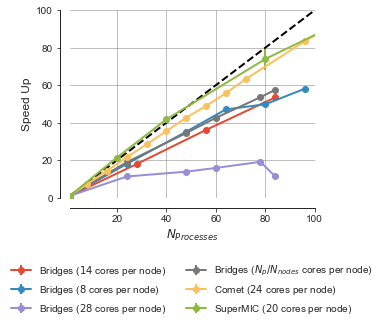

In [6]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

df = [df7_1x_Bridges_1, df7_1x_Bridges_2, df7_1x_Bridges_3, df7_1x_Bridges_4, df7_1x_comet, df7_1x_SuperMIC]
labels = ['Bridges ($14$ cores per node)','Bridges ($8$ cores per node)','Bridges ($28$ cores per node)',
          'Bridges ($N_{p}/N_{nodes}$ cores per node)','Comet ($24$ cores per node)','SuperMIC ($20$ cores per node)']

df[0].index = df[0].loc[:,'blocks']
df[1].index = df[1].loc[:,'blocks']
df[2].index = df[2].loc[:,'blocks']
df[3].index = df[3].loc[:,'blocks']
df[4].index = df[4].loc[:,'blocks']
df[5].index = df[5].loc[:,'blocks']

df[0].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[0])
df[1].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[1])
df[4].plot(y='Ideal_Scaling', ax=ax, linestyle='--', color='k', lw=2, label='')
df[2].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[2])
df[3].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[3])
df[4].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[4])
df[5].plot(y='speed_up', yerr='std_S', ax=ax, marker='o', lw=2, label=labels[5])

ax.yaxis.grid(which='major', linewidth='0.5', color='grey')
ax.xaxis.grid(which='major', linewidth='0.5', color='grey')
ax.yaxis.grid(which='minor', linewidth='0.5', color='grey')
ax.xaxis.grid(which='minor', linewidth='0.5', color='grey')  
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(1, 100)  
ax.set_ylim(0, 100)
sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.3), frameon=False, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_speed-up-clusters'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')